**The problem of optimizing the mixing of food ingredients**


# solving with scipy

In [20]:
from scipy.optimize import linprog

c=[0.0164,0.0463,0.125]

Aeq=[[1,1,1]]

beq=100

A=[[0.38,0.001,0.002],[-0.38,-0.001,-0.002],[0,-0.09,-0.5],[0,0.02,0.08]]

b=[1.2,-0.8,-22,5]

opt = linprog(c=c, A_ub=A, b_ub=b, A_eq=Aeq, b_eq=beq)

opt

     con: array([6.7864363e-09])
     fun: 7.089801904082424
 message: 'Optimization terminated successfully.'
     nit: 7
   slack: array([3.50462104e-10, 4.00000000e-01, 2.53117705e-09, 1.11679959e+00])
  status: 0
 success: True
       x: array([ 2.81708258, 64.85721635, 32.32570106])

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [22]:
df_x=pd.DataFrame({'foods':['Limestone','corn','Soybean flour'],
                   'Amount of each food':[2.81708258,64.85721635,32.32570106]}).sort_values('Amount of each food',ascending=True)
df_x                   

,foods,Amount of each food
0,Limestone,2.817083
2,Soybean flour,32.325701
1,corn,64.857216


<AxesSubplot:xlabel='foods', ylabel='Amount of each food'>

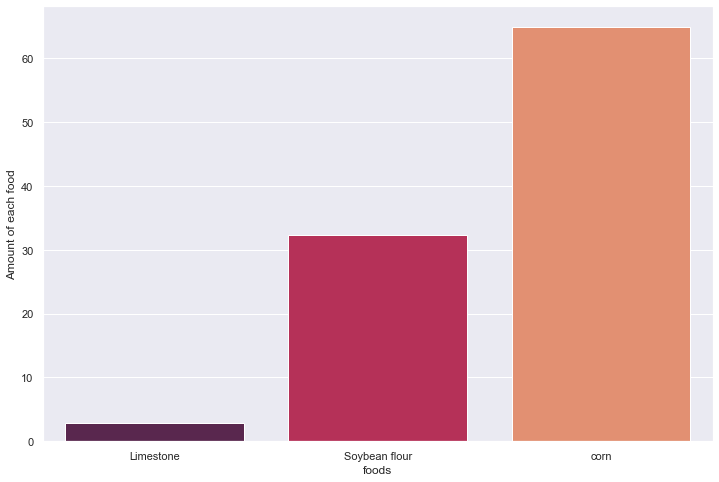

In [23]:
sns.set()
plt.figure(figsize=(12,8))
sns.barplot(data=df_x,x='foods',y='Amount of each food',palette='rocket')


# solving with pyomo

In [18]:
from pyomo.environ import *

# create a model
model = ConcreteModel()

# declare decision variables
model.x1 = Var(domain=NonNegativeReals)
model.x2 = Var(domain=NonNegativeReals)
model.x3 = Var(domain=NonNegativeReals)

# declare objective
model.cost = Objective(expr = 0.0164*model.x1 + 0.0463*model.x2 + 0.125*model.x3, sense=minimize)

# declare constraints
model.con1 = Constraint(expr = model.x1 + model.x2 + model.x3 == 100)
model.con2 = Constraint(expr = 0.38*model.x1 + 0.001*model.x2 + 0.002*model.x3 >= 0.8)
model.con3 = Constraint(expr = 0.38*model.x1 + 0.001*model.x2 + 0.002*model.x3 <= 1.2)
model.con4 = Constraint(expr = 0.09*model.x2 + 0.5*model.x3 >= 22)
model.con5 = Constraint(expr = 0.02*model.x2 + 0.08*model.x3 <= 5)

# solve
results = SolverFactory('glpk').solve(model)
results.write()
if results.solver.status:
    model.pprint()

# display solution
print('\nTotal cost = ', model.cost())

print('\nDecision Variables')
print('Limestone = ', model.x1())
print('Corn = ', model.x2())
print('Soybean flour = ', model.x3())


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 7.08980190378184
  Upper bound: 7.08980190378184
  Number of objectives: 1
  Number of constraints: 6
  Number of variables: 4
  Number of nonzeros: 14
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.047035932540893555
# ----------------------------------------------------------
#   Solution Information
# -------------

# solving with pulp

In [15]:
from pulp import *

problem = LpProblem('optimizing the mixing of the food ', LpMinimize)
x1 = LpVariable('Limestone', lowBound=0 , cat=LpInteger)
x2 = LpVariable('corn', lowBound=0 , cat=LpInteger)
x3 = LpVariable('Soybean flour', lowBound=0 , cat=LpInteger)

#Objective Function
problem += 0.0164*x1 + 0.0463*x2 + 0.125*x3
#Constraints
problem += x1 + x2 + x3 == 100 
problem += 0.38*x1 + 0.001*x2 + 0.002*x3 >= 0.8 
problem += 0.38*x1 + 0.001*x2 + 0.002*x3 <= 1.2 
problem += 0.09*x2 + 0.5*x3 >= 22 
problem += 0.02*x2 + 0.08*x3 <= 5 

print(problem)

problem.solve()
print("Limestone: ", x1.varValue)
print("Corn: ", x2.varValue)
print("Soybean flour: ", x3.varValue)

print("Total cost: ", value(problem.objective))

optimizing_the_mixing_of_the_food_:
MINIMIZE
0.0164*Limestone + 0.125*Soybean_flour + 0.0463*corn + 0.0
SUBJECT TO
_C1: Limestone + Soybean_flour + corn = 100

_C2: 0.38 Limestone + 0.002 Soybean_flour + 0.001 corn >= 0.8

_C3: 0.38 Limestone + 0.002 Soybean_flour + 0.001 corn <= 1.2

_C4: 0.5 Soybean_flour + 0.09 corn >= 22

_C5: 0.08 Soybean_flour + 0.02 corn <= 5

VARIABLES
0 <= Limestone Integer
0 <= Soybean_flour Integer
0 <= corn Integer

Limestone:  2.0
Corn:  65.0
Soybean flour:  33.0
Total cost:  7.1673


C:\Users\Atena\anaconda3\lib\site-packages\pulp\pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")
